## Sentiment Analysis

### 1. Problem Statement

Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.

### 2.Data Set

#### Attributes

###### 1 - id  
##### 2 - label (o/p)
##### 3 - tweet 

### 3. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import warnings
warnings.filterwarnings("ignore")

### 4. Read Data

In [2]:
train_df=pd.read_csv('E:/Analytics Vidhya Contest/Sentiment Analysis/train_2kmZucJ.csv')
test_df=pd.read_csv('E:/Analytics Vidhya Contest/Sentiment Analysis/test_oJQbWVk.csv')

In [3]:
train_df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
train_df.shape,test_df.shape

((7920, 3), (1953, 2))

In [5]:
train_df.label.value_counts()

0    5894
1    2026
Name: label, dtype: int64

### Data Cleaning

In [6]:
combined_df=train_df.append(test_df,ignore_index=True)

1. Remove all @ handlers since it doesnot convey sentiments
2. Remove all numbers,punctuations,special Characters
3. Remove all words less than 3 char as it will not convey useful info

#### Remove @ Handler

In [7]:
def remove_pattern(input_text,pattern):
    pattern_list=re.findall(pattern,input_text)
    for i in pattern_list:
        input_text=re.sub(i,'',input_text)
    return input_text

In [8]:
combined_df['clean_tweet']=np.vectorize(remove_pattern)(combined_df['tweet'],"@[\w]*")

In [9]:
combined_df[135:140]

,id,label,tweet,clean_tweet
135,136,0.0,"@BrbrryLove13 Shesh up, you. Told ya to stop k...","Shesh up, you. Told ya to stop killing my moj..."
136,137,0.0,Spend like three hours finally get all my thin...,Spend like three hours finally get all my thin...
137,138,0.0,This #advertisement for New #Samsung #Galaxy G...,This #advertisement for New #Samsung #Galaxy G...
138,139,1.0,lost all pictures and everything on my phone f...,lost all pictures and everything on my phone f...
139,140,0.0,Check out Jewish American Singles .... free & ...,Check out Jewish American Singles .... free & ...


#### Remove numbers,punctuations,special Characters

In [10]:
combined_df['clean_tweet']=combined_df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")

In [11]:
combined_df.head()

,id,label,tweet,clean_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https goo gl h ...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this Would you go #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...


#### Remove Short Words

In [12]:
combined_df['clean_tweet']=combined_df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [13]:
combined_df.head()

,id,label,tweet,clean_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https MfQV #andro...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


#### Text Normalization

In [14]:
from nltk.stem.porter import PorterStemmer

In [15]:
tokenized_text=combined_df['clean_tweet'].apply(lambda x: x.split())

In [16]:
stemmer=PorterStemmer()
tokenized_text=tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x])

In [17]:
for i in range(len(tokenized_text)):
    tokenized_text[i]=' '.join(tokenized_text[i])
combined_df['clean_tweet']=tokenized_text
combined_df.head()

,id,label,tweet,clean_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnanc test http mfqv #android...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl #yay #s...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love thi would #talk #makememori #unplug #rela...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wire know georg made that #iphon #cute #davent...
4,5,1.0,What amazing service! Apple won't even talk to...,what amaz servic appl even talk about question...


### Data Visualization

In [18]:
all_word=' '.join([text for text in combined_df['clean_tweet']])

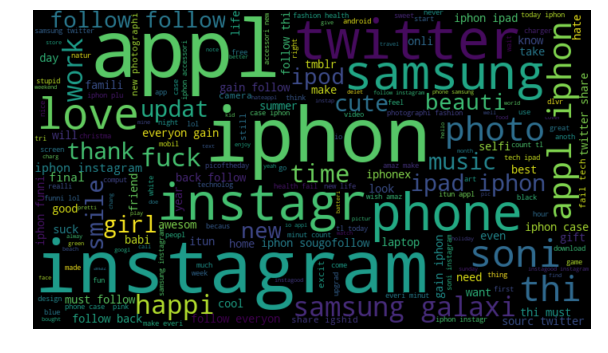

In [19]:
from wordcloud import WordCloud
all_positive_word=WordCloud(width=700,height=400,random_state=42,max_font_size=100).generate(all_word)

plt.figure(figsize=(10,7))
plt.imshow(all_positive_word,interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
positive_word= ' '.join([text for text in combined_df['clean_tweet'][combined_df['label']==0]])

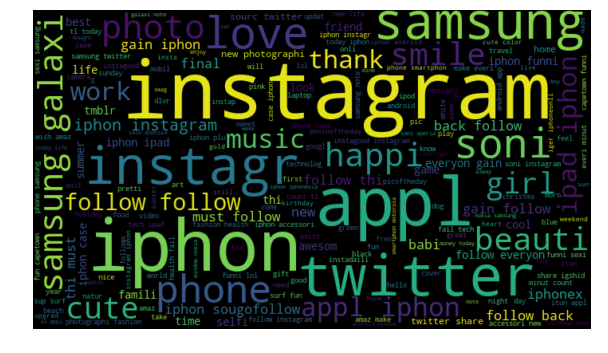

In [21]:
all_positive_word=WordCloud(height=400,width=700,random_state=43,max_font_size=100).generate(positive_word)

plt.figure(figsize=(10,7))
plt.imshow(all_positive_word,interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
negative_word=' '.join([text for text in combined_df['clean_tweet'][combined_df['label']==1]])

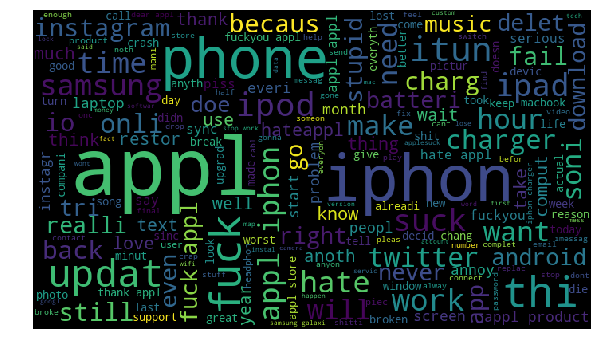

In [23]:
all_negative_word=WordCloud(width=700,height=400,random_state=44,max_font_size=100).generate(negative_word)
plt.figure(figsize=(10,7))
plt.imshow(all_negative_word)
plt.axis('off')
plt.show()

Both positive and negative tweets are dominated by the words appl,iphone,phone

### Feature Extraction

In [24]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [25]:
bow_vectorizer=CountVectorizer(max_df=0.9,min_df=2,stop_words='english',max_features=300)
bow=bow_vectorizer.fit_transform(combined_df['clean_tweet'])
bow.shape

(9873, 300)

In [26]:
tfidfvectorizer=TfidfVectorizer(max_df=0.9,min_df=2,stop_words='english',max_features=300)
tfidf=tfidfvectorizer.fit_transform(combined_df['clean_tweet'])
tfidf.shape

(9873, 300)

In [27]:
import gensim

In [28]:
tokenized_tweet=combined_df['clean_tweet'].apply(lambda x: x.split())
model_w2v=gensim.models.Word2Vec(sentences=tokenized_tweet,size=200,window=5,min_count=2,sg=1,hs=0,negative=10,workers=2,seed=34)
model_w2v.train(tokenized_tweet,total_examples=len(combined_df['clean_tweet']),epochs=20)

(1837645, 2567180)

In [29]:
model_w2v.wv.most_similar('hate')

[('applecar', 0.709620475769043),
 ('wing', 0.7084208726882935),
 ('#smd', 0.7074621319770813),
 ('mac', 0.7047061920166016),
 ('#sorri', 0.703750491142273),
 ('#firefox', 0.702637791633606),
 ('prove', 0.6973992586135864),
 ('#hateio', 0.6959872245788574),
 ('fume', 0.6898738145828247),
 ('honestli', 0.680162787437439)]

In [30]:
def word_vector(tokens,size):
    vec=np.zeros(size).reshape((1,size))
    count=0.
    for word in tokens:
        try:
            vec+=model_w2v[word].reshape((1,size))
            count+=1.
        except KeyError:
            
            continue
    if count!=0:
        vec/=count
    return vec

In [31]:
word2vec_array=np.zeros((len(tokenized_tweet),200))
for i in range(len(tokenized_tweet)):
    word2vec_array[i,:]=word_vector(tokenized_tweet[i],200)
word2vec_df=pd.DataFrame(word2vec_array)
word2vec_df.shape

(9873, 200)

### Model Building

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#### Logistic Regression

##### Bag of words

In [33]:
train_bow=bow[:7920,:]
test_bow=bow[7920:,:]
X_train,X_test,y_train,y_test=train_test_split(train_bow,train_df['label'],random_state=42,test_size=0.3)

In [35]:
logReg=LogisticRegression()
logReg.fit(X_train,y_train)
y_pred_bow=logReg.predict_proba(X_test)
y_pred_bow_int=y_pred_bow[:,1]>=0.3
y_pred_bow_int=y_pred_bow_int.astype(np.int)
f1_score(y_test,y_pred_bow_int)

0.8066528066528067

In [36]:
test_predict=logReg.predict_proba(test_bow)
test_predict_int=test_predict[:,1]>=0.3
test_predict_int=test_predict_int.astype(np.int)
test_df['label']=test_predict_int
submission=test_df[['id','label']]
submission.to_csv('Submission_lr_bow_sentiment.csv',index=False)


#### TF-IDF

In [37]:
train_tfidf = tfidf[:7920,:]
test_tfidf = tfidf[7920:,:]

xtrain_tfidf = train_tfidf[y_train.index]
xvalid_tfidf = train_tfidf[y_test.index]

In [38]:
logReg.fit(xtrain_tfidf,y_train)
pred_tfidf=logReg.predict_proba(xvalid_tfidf)
pred_tfidf_int=pred_tfidf[:,1]>=0.3
pred_tfidf_int=pred_tfidf_int.astype(np.int)
f1_score(y_test,pred_tfidf_int)

0.8092243186582809

#### w2v

In [39]:
train_w2v = word2vec_df.iloc[:7920,:]
test_w2v = word2vec_df.iloc[7920:,:]

xtrain_w2v = train_w2v.iloc[y_train.index,:]
xvalid_w2v = train_w2v.iloc[y_test.index,:]

In [40]:
logReg=LogisticRegression()
logReg.fit(xtrain_w2v,y_train)
pred_w2v=logReg.predict_proba(xvalid_w2v)
pred_w2v_int=pred_w2v[:,1]>=0.3
pred_w2v_int=pred_w2v_int.astype(np.int)
f1_score(y_test,pred_w2v_int)

0.8207612456747404

In [41]:
test_predict=logReg.predict_proba(test_w2v)
test_predict_int=test_predict[:,1]>=0.3
test_predict_int=test_predict_int.astype(np.int)
test_df['label']=test_predict_int
submission=test_df[['id','label']]
submission.to_csv('Submission_lr_w2v_sentiment.csv',index=False)

### RandomForest

##### Bag of Words

In [44]:
randomForest=RandomForestClassifier(n_estimators=80)
randomForest.fit(X_train,y_train)
y_pred=randomForest.predict_proba(X_test)
pred_int=y_pred[:,1]>=0.3
pred_int=pred_int.astype(np.int)
f1_score(y_test,pred_int)

0.8008185538881311

##### TF-IDF

In [45]:
randomForest.fit(xtrain_tfidf,y_train)
pred_tfidf=randomForest.predict_proba(xvalid_tfidf)
pred_tfidf_int=pred_tfidf[:,1]>=0.3
pred_tfidf_int=pred_tfidf_int.astype(np.int)
f1_score(y_test,pred_tfidf_int)

0.8117727583846681

##### W2V

In [46]:
randomForest.fit(xtrain_w2v,y_train)
pred_w2v=randomForest.predict_proba(xvalid_w2v)
pred_w2v_int=pred_w2v[:,1]>=0.3
pred_w2v_int=pred_w2v_int.astype(np.int)
f1_score(y_test,pred_w2v_int)

0.8165760869565218

In [47]:
test_predict=randomForest.predict_proba(test_w2v)
test_predict_int=test_predict[:,1]>=0.3
test_predict_int=test_predict_int.astype(np.int)
test_df['label']=test_predict_int
submission=test_df[['id','label']]
submission.to_csv('Submission_rf_w2v_sentiment.csv',index=False)

### XGBOOST 

In [48]:
from xgboost import XGBClassifier

In [59]:
xgb=XGBClassifier(n_estimators=50,max_depth=5)

##### BOW

In [54]:
xgb.fit(X_train,y_train)
y_pred=xgb.predict_proba(X_test)
pred_int=y_pred[:,1]>=0.3
pred_int=pred_int.astype(np.int)
f1_score(y_test,pred_int)

0.789329685362517

##### TF-IDF

In [55]:
xgb.fit(xtrain_tfidf,y_train)
pred_tfidf=xgb.predict_proba(xvalid_tfidf)
pred_tfidf_int=pred_tfidf[:,1]>=0.3
pred_tfidf_int=pred_tfidf_int.astype(np.int)
f1_score(y_test,pred_tfidf_int)

0.7743694614860258

##### W2V 

In [60]:
xgb.fit(xtrain_w2v,y_train)
pred_w2v=xgb.predict_proba(xvalid_w2v)
pred_w2v_int=pred_w2v[:,1]>=0.3
pred_w2v_int=pred_w2v_int.astype(np.int)
f1_score(y_test,pred_w2v_int)

0.8222222222222222

In [61]:
test_predict=xgb.predict_proba(test_w2v)
test_predict_int=test_predict[:,1]>=0.3
test_predict_int=test_predict_int.astype(np.int)
test_df['label']=test_predict_int
submission=test_df[['id','label']]
submission.to_csv('Submission_xgb_w2v_sentiment.csv',index=False)
